#### Name of Student: Ayush Saini

#### College Name: Symbiosis Institute of Technology, Pune

#### Start & End Date: 29 May 2021 to 13 July 2021

#### Name of Project: Australia Rain Prediction using ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
null_sum=data.isna().sum()
null_sum

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
total=null_sum.sort_values(ascending=False)
total

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [5]:
percent=(((total/len(data.index))*100).round(2)).sort_values(ascending=False)
percent

Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
Location          0.00
Date              0.00
dtype: float64

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
temp_data=data.iloc[:,2:-2]
temp_data=temp_data.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1)
temp_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [8]:
mode=np.array(temp_data.mode()).reshape(16,)
mean=np.array(pd.Series(data.mean()))
median=np.array(data.median())

In [9]:
print(mode.shape)
print(mean.shape)
print(median.shape)

(16,)
(16,)
(16,)


In [10]:
m3DF = pd.DataFrame({'Index':temp_data.columns,'Mean':mean,'Median':median,'Mode':mode})
m3DF
#m3DF.set_index('Index')
#mean<median<mode   ->leftskewed
#mode<median<mean   ->rightskewed

,Index,Mean,Median,Mode
0,MinTemp,12.194034,12.0,11.0
1,MaxTemp,23.221348,22.6,20.0
2,Rainfall,2.360918,0.0,0.0
3,Evaporation,5.468232,4.8,4.0
4,Sunshine,7.611178,8.4,0.0
5,WindGustSpeed,40.035230,39.0,35.0
6,WindSpeed9am,14.043426,13.0,9.0
7,WindSpeed3pm,18.662657,19.0,13.0
8,Humidity9am,68.880831,70.0,99.0
9,Humidity3pm,51.539116,52.0,52.0


In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

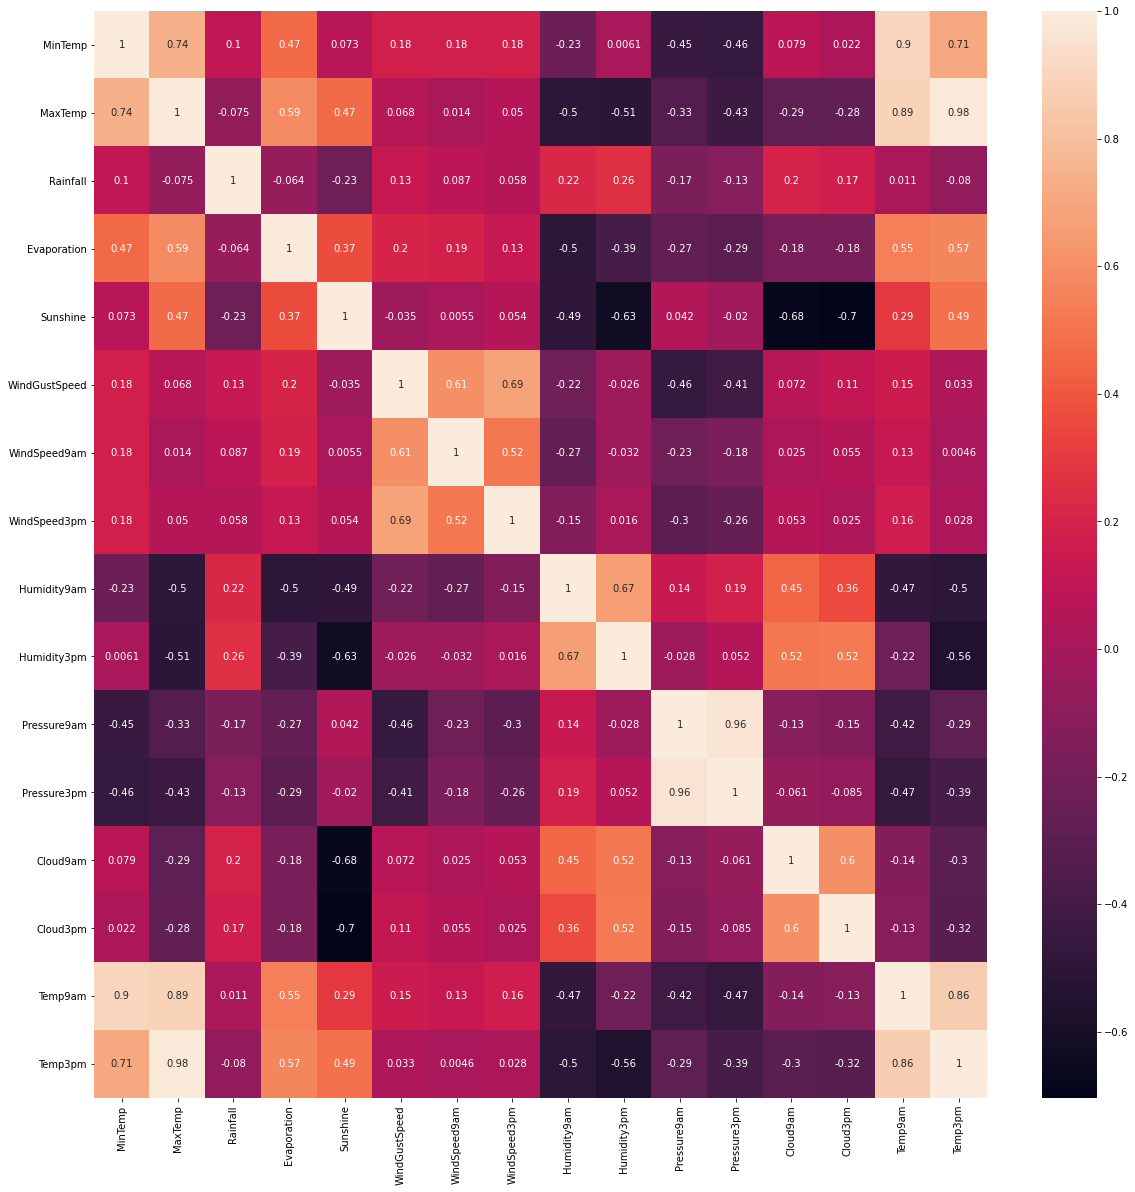

In [12]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

In [13]:
def distplot_with_labels(data,feature):
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


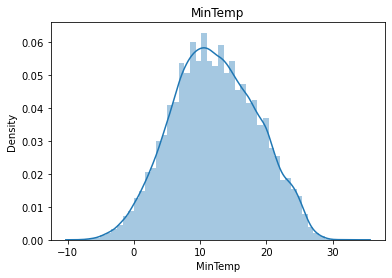

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


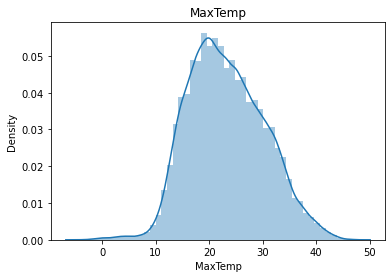

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


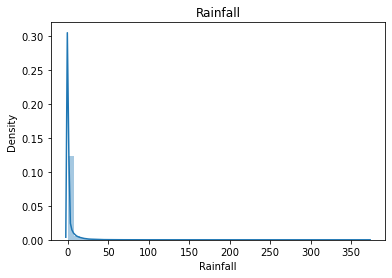

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


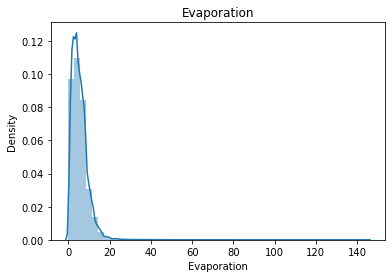

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


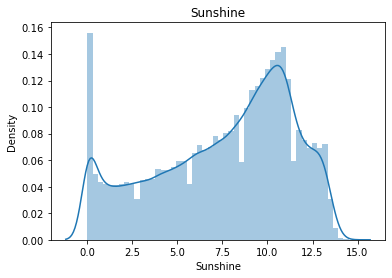

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


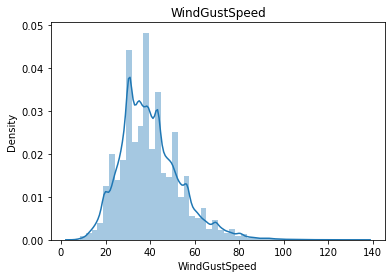

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


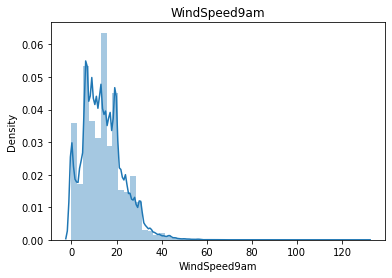

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


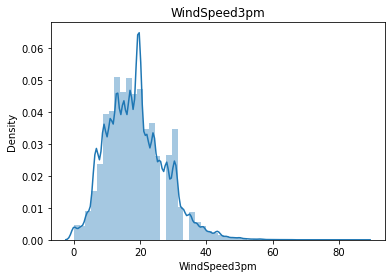

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


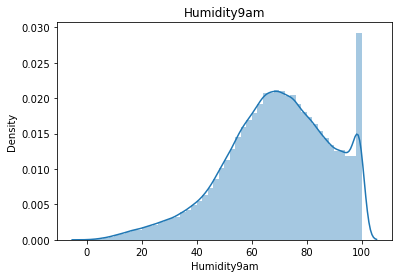

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


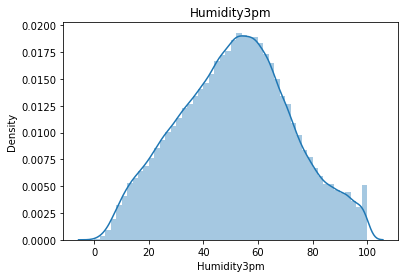

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


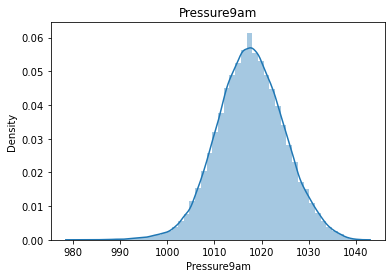

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


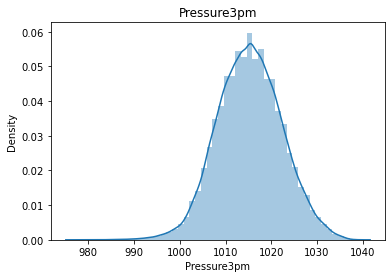

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


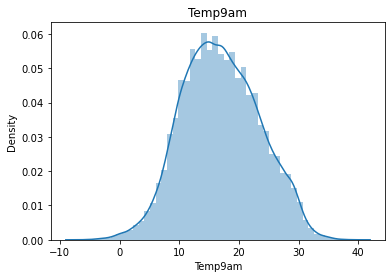

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


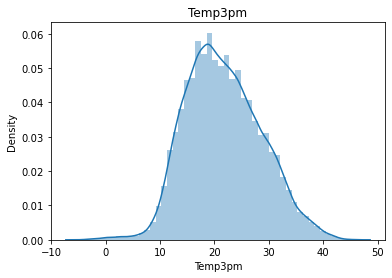

<Figure size 1080x1080 with 0 Axes>

In [14]:
distplot_with_labels(data,'MinTemp')
distplot_with_labels(data,'MaxTemp')
distplot_with_labels(data,'Rainfall')
distplot_with_labels(data,'Evaporation')
distplot_with_labels(data,'Sunshine')
distplot_with_labels(data,'WindGustSpeed')
distplot_with_labels(data,'WindSpeed9am')
distplot_with_labels(data,'WindSpeed3pm')
distplot_with_labels(data,'Humidity9am')
distplot_with_labels(data,'Humidity3pm')
distplot_with_labels(data,'Pressure9am')
distplot_with_labels(data,'Pressure3pm')
distplot_with_labels(data,'Temp9am')
distplot_with_labels(data,'Temp3pm')

In [15]:
def draw_boxplot(data,feature):
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(40,40))
    plt.show()

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


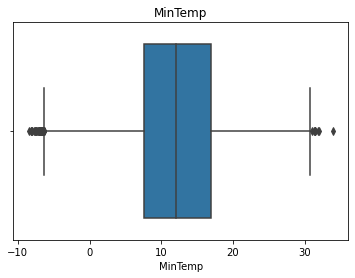

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


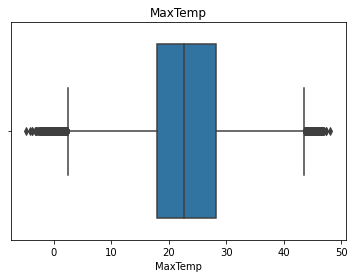

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


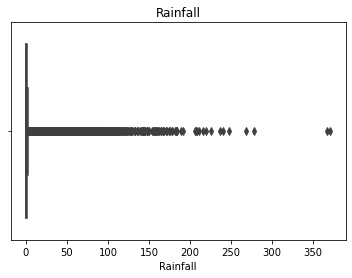

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


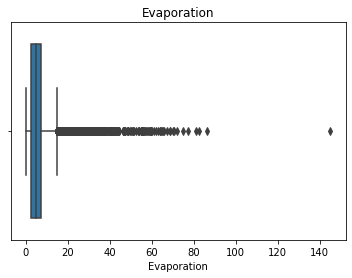

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


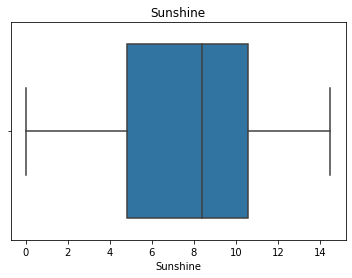

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


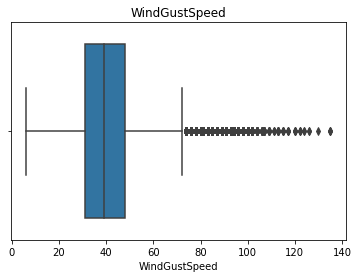

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


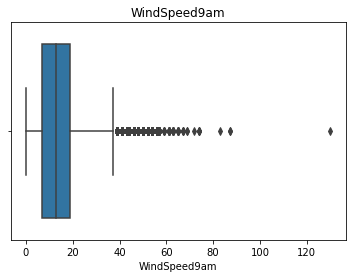

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


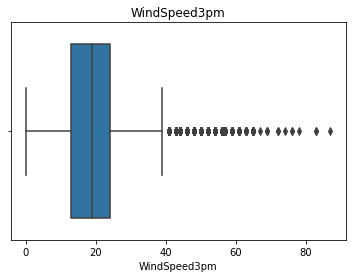

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


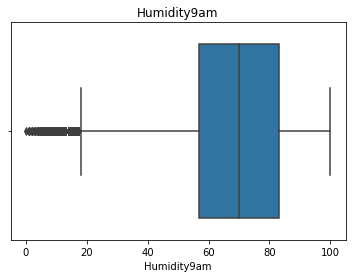

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


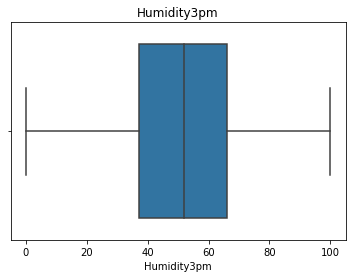

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


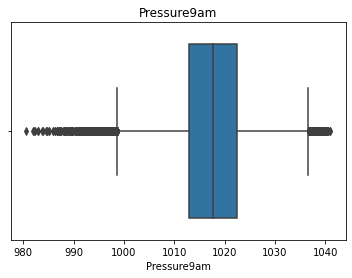

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


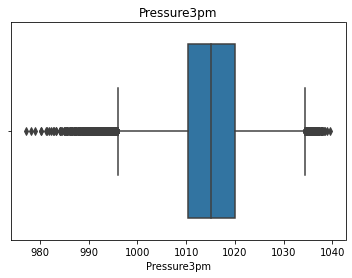

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


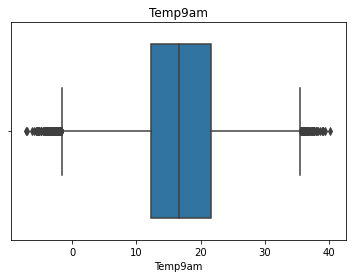

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


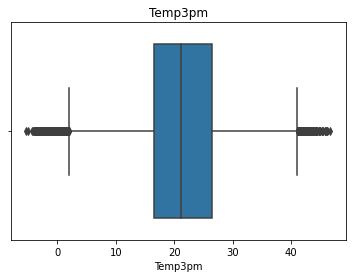

<Figure size 2880x2880 with 0 Axes>

In [16]:
draw_boxplot(data,'MinTemp')
draw_boxplot(data,'MaxTemp')
draw_boxplot(data,'Rainfall')
draw_boxplot(data,'Evaporation')
draw_boxplot(data,'Sunshine')
draw_boxplot(data,'WindGustSpeed')
draw_boxplot(data,'WindSpeed9am')
draw_boxplot(data,'WindSpeed3pm')
draw_boxplot(data,'Humidity9am')
draw_boxplot(data,'Humidity3pm')
draw_boxplot(data,'Pressure9am')
draw_boxplot(data,'Pressure3pm')
draw_boxplot(data,'Temp9am')
draw_boxplot(data,'Temp3pm')

In [17]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)
# print("Lower fence: ",Q1-3*IQR,data.quantile(0.25))
# print("Upper fence",Q3+3*IQR,data.quantile(0.90))

<ipython-input-17-96e33c3f3633>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-17-96e33c3f3633>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


(112175, 23)


C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


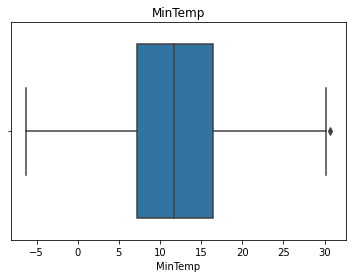

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


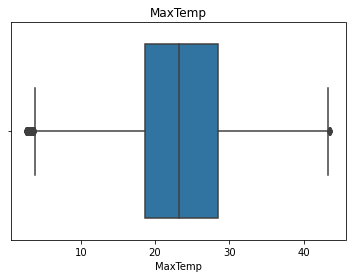

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


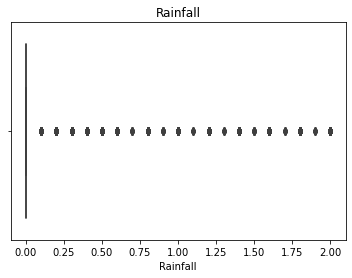

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


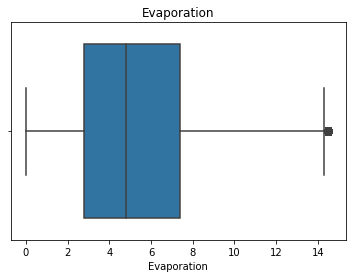

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


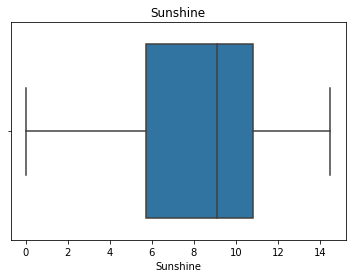

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


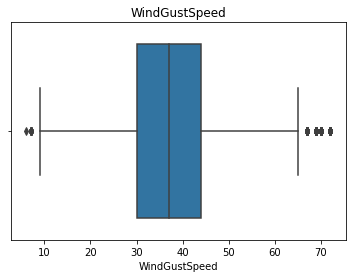

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


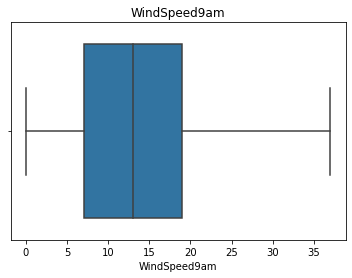

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


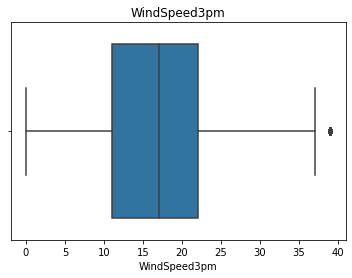

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


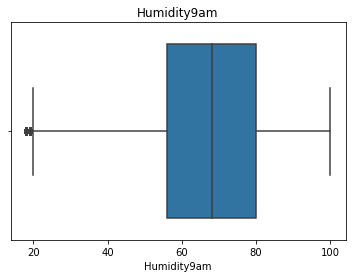

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


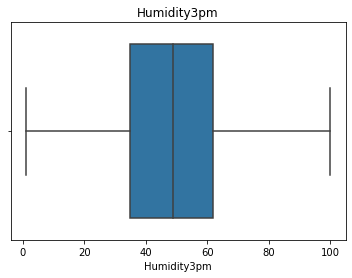

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


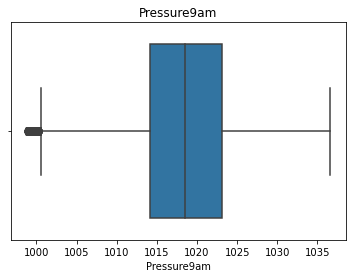

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


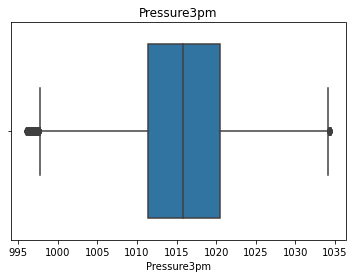

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


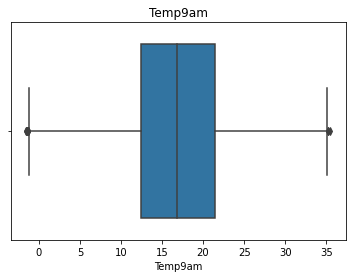

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


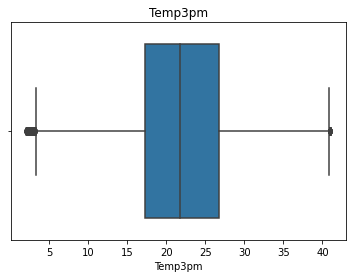

<Figure size 2880x2880 with 0 Axes>

In [18]:
draw_boxplot(data,'MinTemp')
draw_boxplot(data,'MaxTemp')
draw_boxplot(data,'Rainfall')
draw_boxplot(data,'Evaporation')
draw_boxplot(data,'Sunshine')
draw_boxplot(data,'WindGustSpeed')
draw_boxplot(data,'WindSpeed9am')
draw_boxplot(data,'WindSpeed3pm')
draw_boxplot(data,'Humidity9am')
draw_boxplot(data,'Humidity3pm')
draw_boxplot(data,'Pressure9am')
draw_boxplot(data,'Pressure3pm')
draw_boxplot(data,'Temp9am')
draw_boxplot(data,'Temp3pm')

In [19]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [20]:
data['Cloud9am'].fillna(m3DF.iloc[12][3],inplace=True)

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
data['Cloud3pm'].fillna(m3DF.iloc[13][3],inplace=True)

In [22]:
data['Rainfall'].fillna(m3DF.iloc[2][2],inplace=True)

In [23]:
data['Evaporation'].fillna(m3DF.iloc[3][2],inplace=True)

In [24]:
data['MinTemp'].fillna(m3DF.iloc[0][1],inplace=True)

In [25]:
data['MaxTemp'].fillna(m3DF.iloc[1][1],inplace=True)

In [26]:
data['Sunshine'].fillna(m3DF.iloc[4][2],inplace=True)

In [27]:
data['WindGustSpeed'].fillna(m3DF.iloc[5][1],inplace=True)
data['WindSpeed9am'].fillna(m3DF.iloc[6][1],inplace=True)
data['WindSpeed3pm'].fillna(m3DF.iloc[7][1],inplace=True)

In [28]:
data['Humidity9am'].fillna(m3DF.iloc[8][1],inplace=True)
data['Humidity3pm'].fillna(m3DF.iloc[9][1],inplace=True)

In [29]:
data['Pressure9am'].fillna(m3DF.iloc[10][1],inplace=True)
data['Pressure3pm'].fillna(m3DF.iloc[11][1],inplace=True)

In [30]:
data['Temp9am'].fillna(m3DF.iloc[14][1],inplace=True)
data['Temp3pm'].fillna(m3DF.iloc[15][1],inplace=True)

In [31]:
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      7953
WindGustSpeed       0
WindDir9am       8980
WindDir3pm       3349
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3024
RainTomorrow     2712
dtype: int64

In [32]:
data.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

<ipython-input-32-7b27fb1da12c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['RainToday','RainTomorrow'],inplace=True)


In [33]:
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6960
WindGustSpeed       0
WindDir9am       8148
WindDir3pm       2837
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [34]:
data.shape

(108173, 23)

In [35]:
#data.replace("", float("NaN"), inplace=True)
# data['WindDir9am'].fillna(data['WindDir9am'].mode(),inplace=True)
#replace with mode
data=data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [36]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [37]:
data1=data.iloc[:,2:]
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,No
145455,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
145456,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
145457,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No


C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


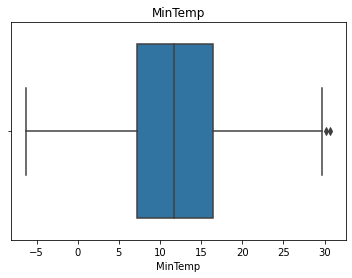

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


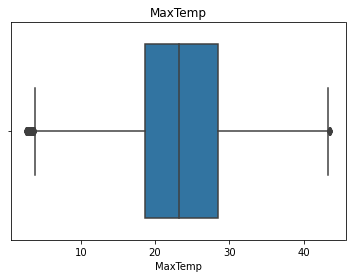

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


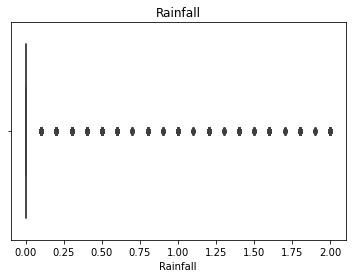

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


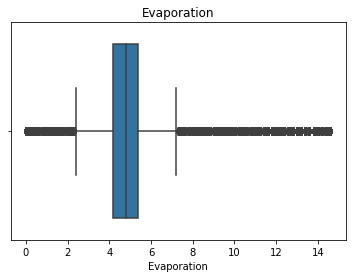

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


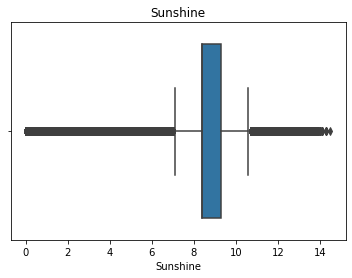

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


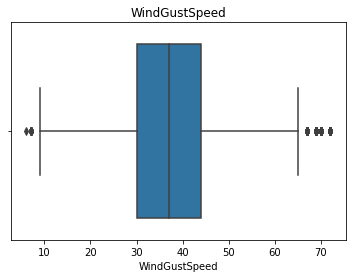

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


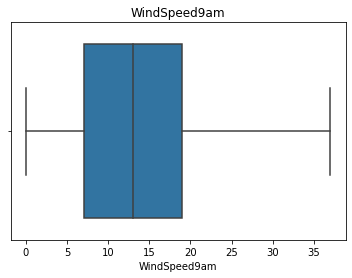

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


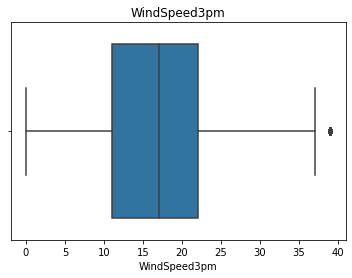

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


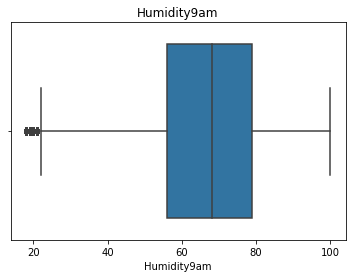

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


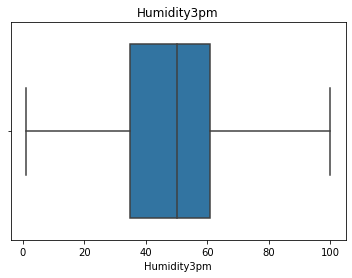

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


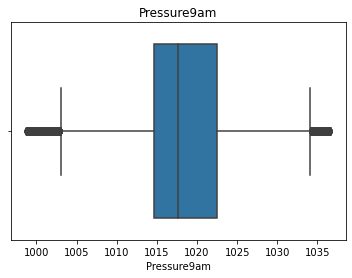

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


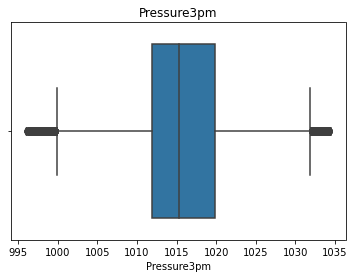

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


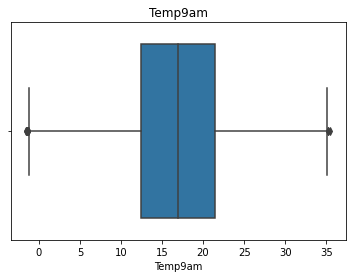

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


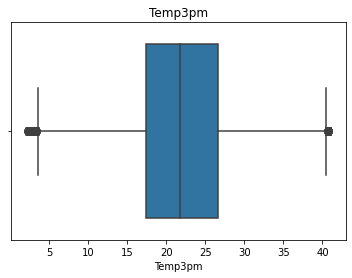

<Figure size 2880x2880 with 0 Axes>

In [38]:
draw_boxplot(data1,'MinTemp')
draw_boxplot(data1,'MaxTemp')
draw_boxplot(data1,'Rainfall')
draw_boxplot(data1,'Evaporation')
draw_boxplot(data1,'Sunshine')
draw_boxplot(data1,'WindGustSpeed')
draw_boxplot(data1,'WindSpeed9am')
draw_boxplot(data1,'WindSpeed3pm')
draw_boxplot(data1,'Humidity9am')
draw_boxplot(data1,'Humidity3pm')
draw_boxplot(data1,'Pressure9am')
draw_boxplot(data1,'Pressure3pm')
draw_boxplot(data1,'Temp9am')
draw_boxplot(data1,'Temp3pm')

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


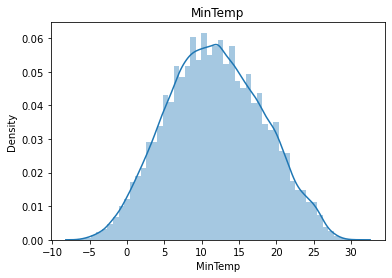

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


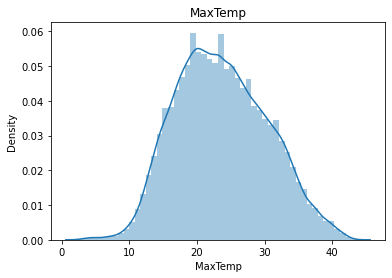

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


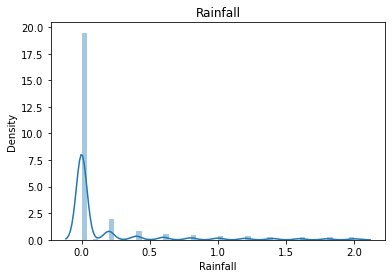

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


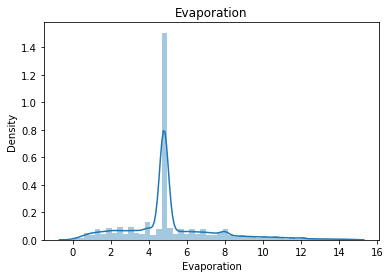

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


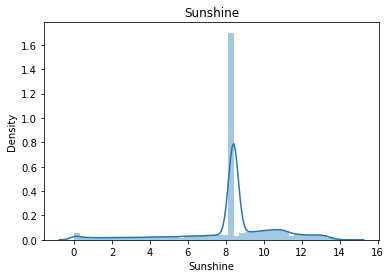

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


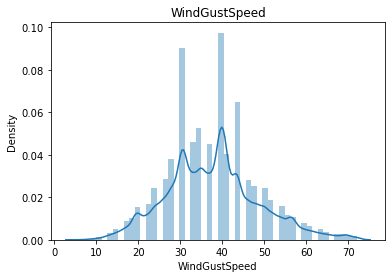

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


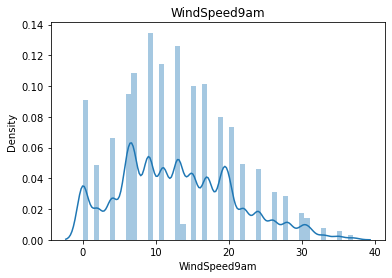

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


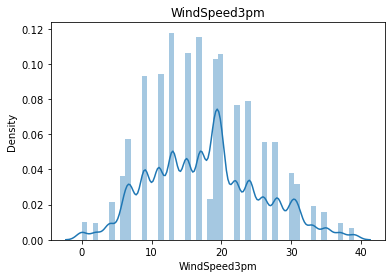

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


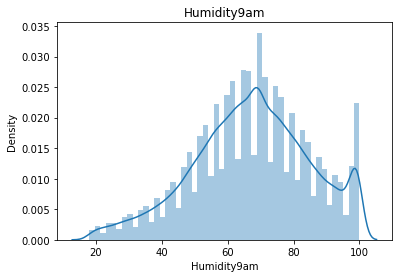

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


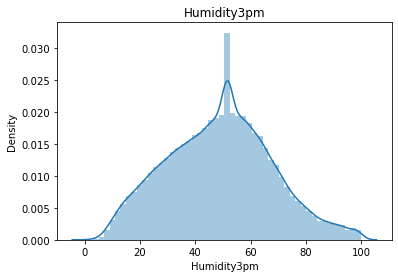

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


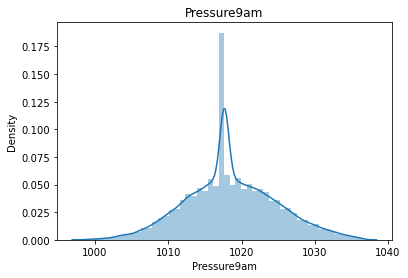

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


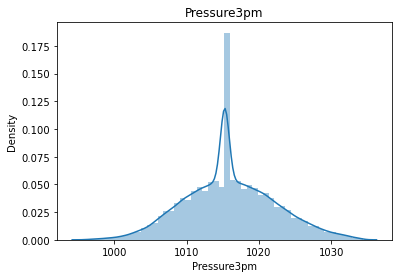

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


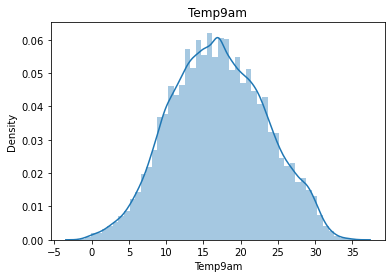

<Figure size 1080x1080 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


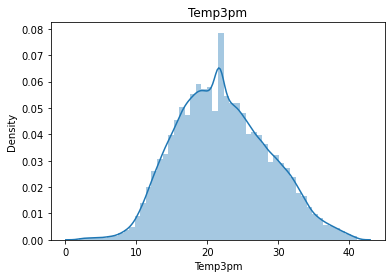

<Figure size 1080x1080 with 0 Axes>

In [39]:
distplot_with_labels(data1,'MinTemp')
distplot_with_labels(data1,'MaxTemp')
distplot_with_labels(data1,'Rainfall')
distplot_with_labels(data1,'Evaporation')
distplot_with_labels(data1,'Sunshine')
distplot_with_labels(data1,'WindGustSpeed')
distplot_with_labels(data1,'WindSpeed9am')
distplot_with_labels(data1,'WindSpeed3pm')
distplot_with_labels(data1,'Humidity9am')
distplot_with_labels(data1,'Humidity3pm')
distplot_with_labels(data1,'Pressure9am')
distplot_with_labels(data1,'Pressure3pm')
distplot_with_labels(data1,'Temp9am')
distplot_with_labels(data1,'Temp3pm')

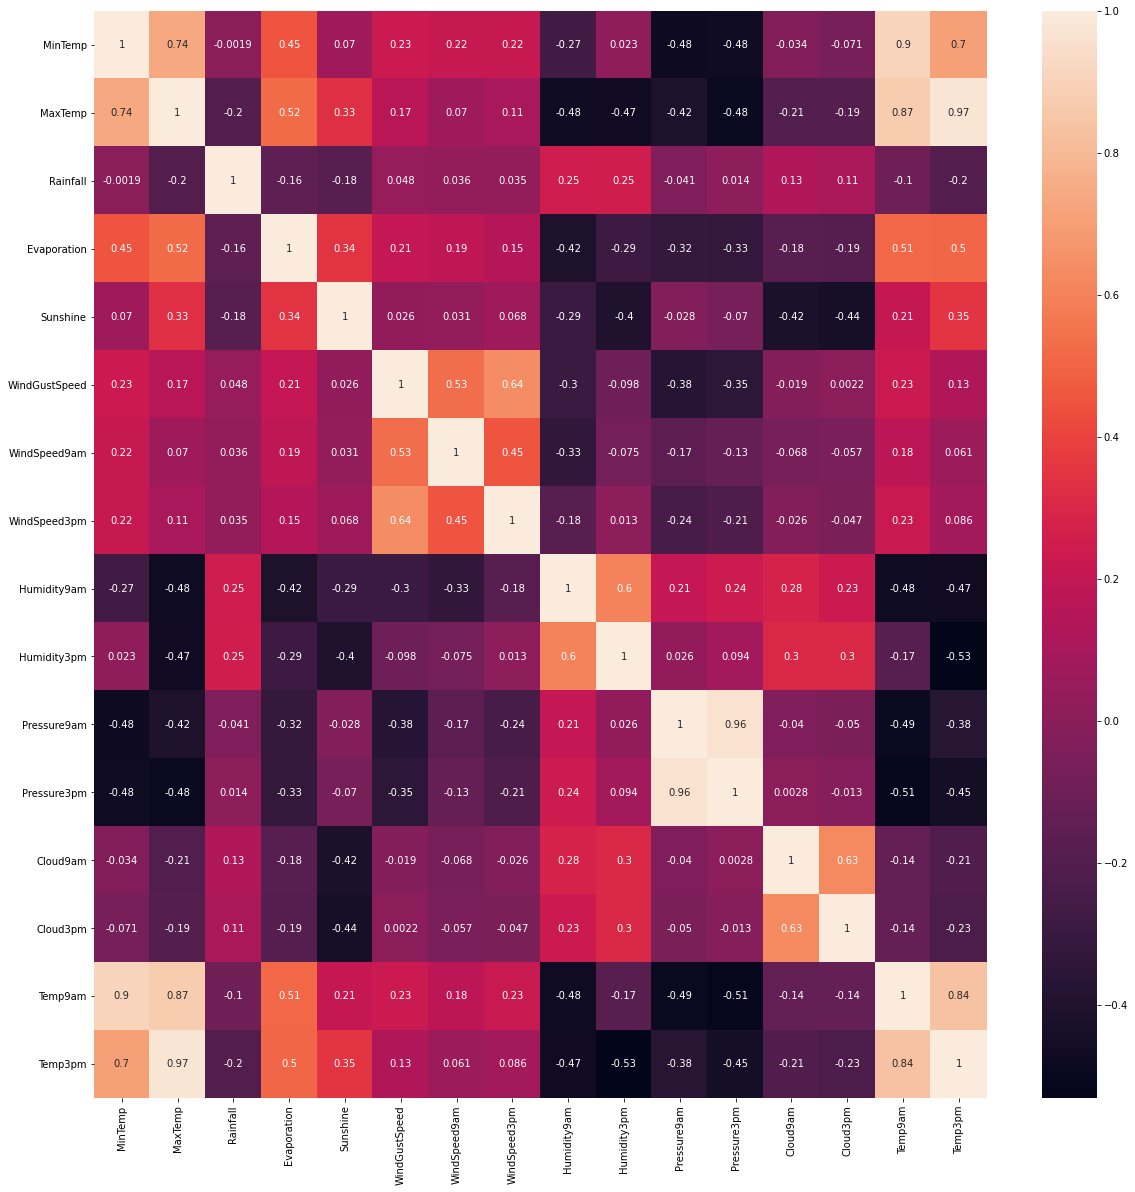

In [40]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


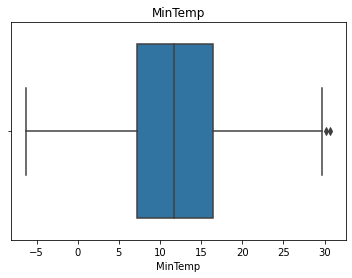

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


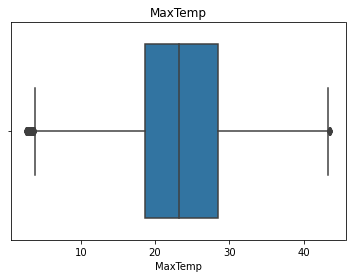

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


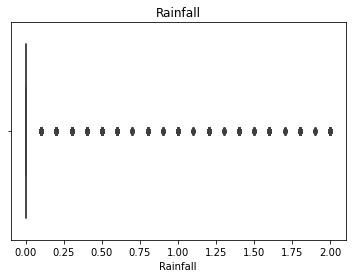

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


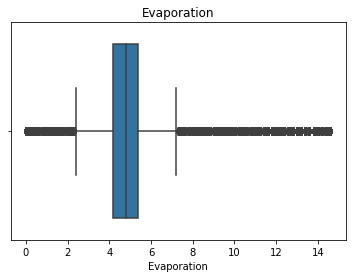

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


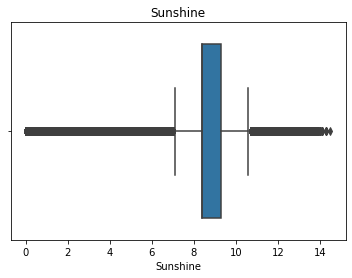

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


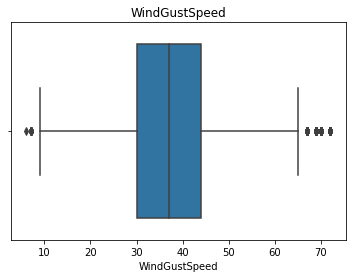

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


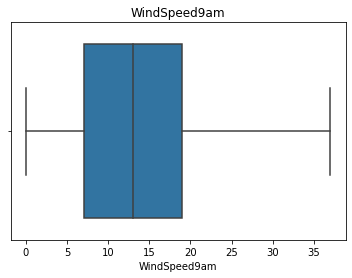

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


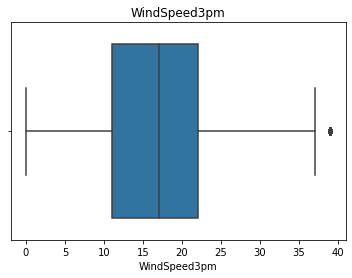

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


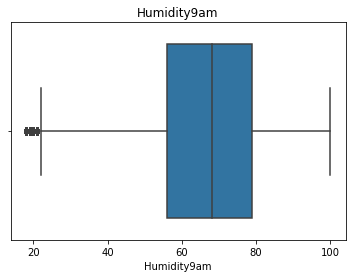

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


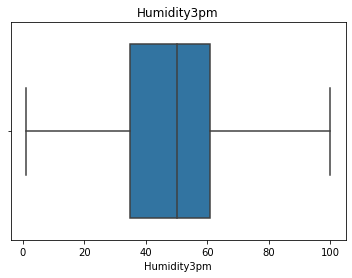

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


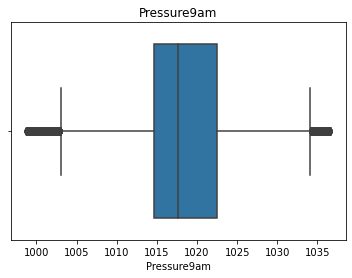

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


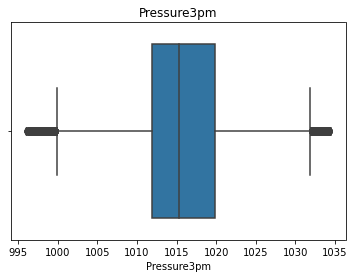

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


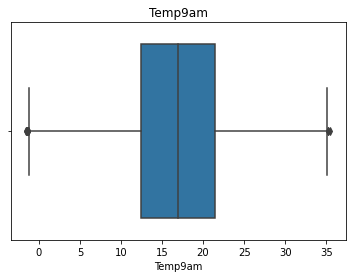

<Figure size 2880x2880 with 0 Axes>

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


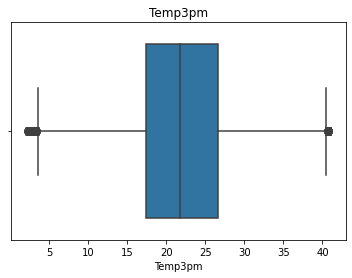

<Figure size 2880x2880 with 0 Axes>

In [41]:
draw_boxplot(data1,'MinTemp')
draw_boxplot(data1,'MaxTemp')
draw_boxplot(data1,'Rainfall')
draw_boxplot(data1,'Evaporation')
draw_boxplot(data1,'Sunshine')
draw_boxplot(data1,'WindGustSpeed')
draw_boxplot(data1,'WindSpeed9am')
draw_boxplot(data1,'WindSpeed3pm')
draw_boxplot(data1,'Humidity9am')
draw_boxplot(data1,'Humidity3pm')
draw_boxplot(data1,'Pressure9am')
draw_boxplot(data1,'Pressure3pm')
draw_boxplot(data1,'Temp9am')
draw_boxplot(data1,'Temp3pm')

In [42]:
x=data1['RainTomorrow'].tolist()
for i in range(len(x)):
    if x[i] == 'Yes':
        x[i]=1
    else:
        x[i]=0

In [43]:
data1['RainTomorrow']=x
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,0
1,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,0
2,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,0
3,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,0
4,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,0
145455,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,0
145456,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,0
145457,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,0


In [44]:
x=data1['RainToday'].tolist()
for i in range(len(x)):
    if x[i] == 'Yes':
        x[i]=1
    else:
        x[i]=0

In [45]:
data1['RainToday']=x
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0
145455,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0


In [46]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1['WindGustDir']=lb.fit_transform(data1['WindGustDir'])

In [47]:
data1['WindDir9am']=lb.fit_transform(data1['WindDir9am'])
data1['WindDir3pm']=lb.fit_transform(data1['WindDir3pm'])

In [48]:
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,0,31.0,2,0,15.0,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0
145455,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0


In [49]:
y=data1.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
data1.drop('RainTomorrow',axis=1,inplace=True)
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0
2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0
4,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0
145455,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0
145456,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0
145457,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0


<Figure size 1440x1440 with 0 Axes>

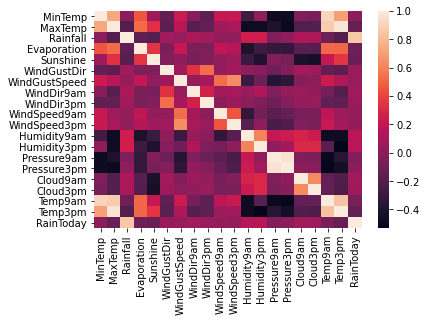

<Figure size 1440x1440 with 0 Axes>

In [51]:
sns.heatmap(data1.corr())   
plt.figure(figsize=(20,20))

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [53]:
x=sc.fit_transform(data1)
x

array([[ 0.24615015, -0.11351492,  1.13304607, ..., -0.01516787,
        -0.05259489, -0.23817603],
       [-0.69398013,  0.21262995, -0.39656259, ...,  0.03211571,
         0.33189772, -0.23817603],
       [ 0.16780596,  0.30157855, -0.39656259, ...,  0.63104103,
         0.16272097, -0.23817603],
       ...,
       [-1.28939597,  0.24227948, -0.39656259, ..., -0.96083943,
         0.36265713, -0.23817603],
       [-1.00735689,  0.47947575, -0.39656259, ..., -0.70866035,
         0.60873241, -0.23817603],
       [-0.63130478,  0.49430051, -0.39656259, ..., -0.29886934,
         0.5933527 , -0.23817603]])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(86538, 20)
(21635, 20)
(86538,)
(21635,)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model=Sequential()

In [58]:
model.add(Dense(input_dim=20,kernel_initializer='random_uniform',units=15,activation='relu'))

In [59]:
model.add(Dense(units=8,kernel_initializer='random_uniform',activation='relu'))

In [60]:
# model.add(Dense(units=5,kernel_initializer='random_uniform',activation='relu'))

In [61]:
model.add(Dense(units=1,kernel_initializer='random_uniform',activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [64]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
2705/2705 [==============================] - 2s 582us/step - loss: 0.3427 - accuracy: 0.8583
Epoch 2/20
2705/2705 [==============================] - 2s 588us/step - loss: 0.3169 - accuracy: 0.8715
Epoch 3/20
2705/2705 [==============================] - 2s 574us/step - loss: 0.3139 - accuracy: 0.8716
Epoch 4/20
2705/2705 [==============================] - 2s 589us/step - loss: 0.3126 - accuracy: 0.8728
Epoch 5/20
2705/2705 [==============================] - 2s 595us/step - loss: 0.3117 - accuracy: 0.8730
Epoch 6/20
2705/2705 [==============================] - 2s 637us/step - loss: 0.3108 - accuracy: 0.8737
Epoch 7/20
2705/2705 [==============================] - 2s 629us/step - loss: 0.3100 - accuracy: 0.8739
Epoch 8/20
2705/2705 [==============================] - 2s 594us/step - loss: 0.3097 - accuracy: 0.8740
Epoch 9/20
2705/2705 [==============================] - 2s 626us/step - loss: 0.3093 - accuracy: 0.8746
Epoch 10/20
2705/2705 [==============================] - 2s 614u

In [65]:
y_pred=model.predict(x_test)
y_pred

array([[0.2503757 ],
       [0.290357  ],
       [0.00233805],
       ...,
       [0.0360212 ],
       [0.02179807],
       [0.00619182]], dtype=float32)

In [66]:
y_pred=(y_pred>=0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8758030968338341

In [68]:
#confusion matrix to find where our model has gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)   
cm
#17677 are correctly predicted true, 565 wrongly predicted true
#2194 correctly predicted false, 1199 wrongly predicted false

array([[17770,   495],
       [ 2192,  1178]], dtype=int64)